In [2]:
import traja
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage.filters import gaussian_filter
from scipy import stats

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18084\3588548849.py:7: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


In [3]:
def openFile(ff):
    df = pd.read_csv(ff, sep=" ",header = None, names=['numb', 'time', 'x', 'y'])
    df = df.drop('numb', axis=1)
    df = df.drop(df[df.time > 1755].index)
    df.traja.plot()
    return(df)

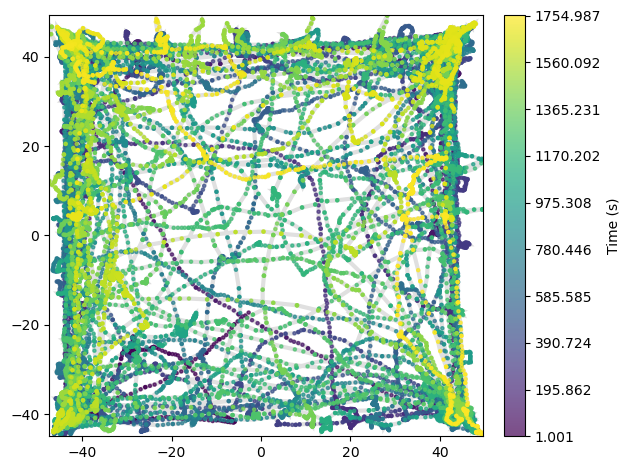

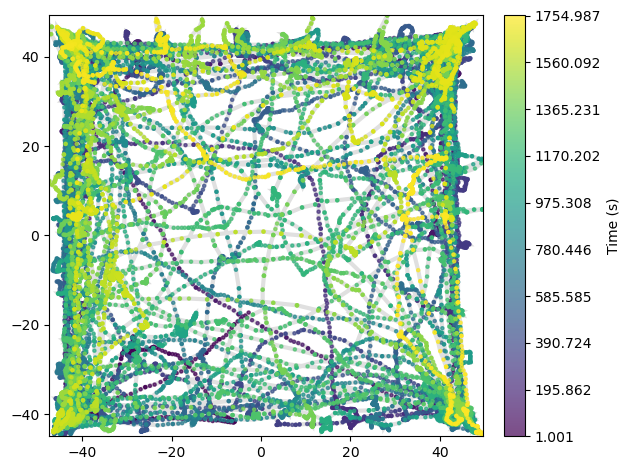

In [4]:
df = openFile('Trace_6.txt')
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
df.traja.plot()

In [5]:
k = []
for i in range(27369):
    if i % 90 == 0:
        k.append(i)

In [6]:
df = df.iloc[k]
df

,time,x,y
0,1.001,-2.749,-17.252
90,4.004,-34.125,-41.424
180,7.007,-23.982,-24.930
270,10.010,-28.153,-27.016
360,13.013,-28.343,-25.878
...,...,...,...
27000,901.901,43.415,21.707
27090,904.904,43.983,-40.381
27180,907.907,24.267,-23.129
27270,910.910,0.474,-35.737


In [7]:
xy = []
x0 = df['x'][0]
y0 = df['y'][0]
delX = []
delY = []
for i in range(len(df)):
    dx = df.iloc[i]['x'] - x0
    dy = df.iloc[i]['y'] - y0
    xxy = pow(pow(dx, 2) + pow(dy, 2), 0.5)
    delX.append(dx)
    delY.append(dy)
    xy.append(xxy)
    x0 = df.iloc[i]['x']
    y0 = df.iloc[i]['y']

In [8]:
tt = []
t0 = df['time'][0]
for i in range(len(df)):
    dt = df.iloc[i]['time'] - t0
    tt.append(dt)
    t0 = df.iloc[i]['time']

In [9]:
dg = df.copy()
dg.insert(3, "dx", delX)
dg.insert(4, "dy", delY)
dg.insert(5, "xy", xy)
dg

,time,x,y,dx,dy,xy
0,1.001,-2.749,-17.252,0.000,0.000,0.000000
90,4.004,-34.125,-41.424,-31.376,-24.172,39.607309
180,7.007,-23.982,-24.930,10.143,16.494,19.363173
270,10.010,-28.153,-27.016,-4.171,-2.086,4.663543
360,13.013,-28.343,-25.878,-0.190,1.138,1.153752
...,...,...,...,...,...,...
27000,901.901,43.415,21.707,12.134,-22.182,25.283890
27090,904.904,43.983,-40.381,0.568,-62.088,62.090598
27180,907.907,24.267,-23.129,-19.716,17.252,26.198324
27270,910.910,0.474,-35.737,-23.793,-12.608,26.927096


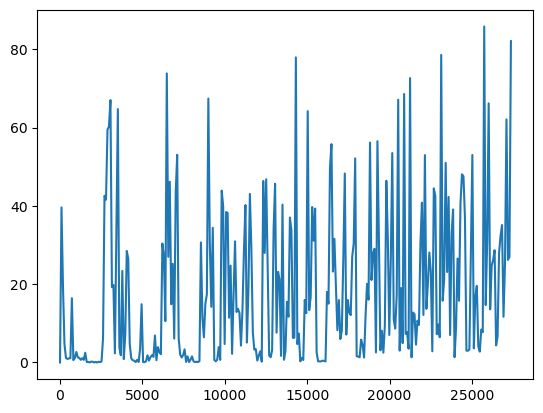

In [11]:
plt.plot(dg['xy'])

In [12]:
xynum = dg['xy'].to_numpy()
xynum

array([ 0.        , 39.60730943, 19.36317342,  4.6635434 ,  1.15375214,
        0.89400224,  1.05918082,  1.0809741 , 16.42099062,  0.59956818,
        1.1568375 ,  2.68471265,  1.32003788,  1.15601817,  0.664     ,
        1.1051371 ,  0.6696305 ,  2.48826526,  0.13435029,  0.13435029,
        0.        ,  0.21242646,  0.189     ,  0.        ,  0.13364505,
        0.        ,  0.19      ,  0.094     ,  0.285     ,  6.19117711,
       42.56463931, 41.58031   , 59.44044839, 60.29737776, 67.017     ,
       19.24223451, 19.80523479,  2.3322189 , 32.69459351, 64.71143474,
        3.84915432,  1.84096116, 23.39331009,  0.87390446,  7.15371372,
       28.48975319, 26.55182188,  4.73977215,  1.10878537,  0.55308318,
        0.47420038,  0.095     ,  0.6697716 ,  0.13364505,  3.48456784,
       14.87450436,  0.095     ,  0.095     ,  0.30041638,  1.84044614,
        0.47420038,  1.34067446,  1.86681547,  1.43463724,  6.90124199,
        0.569     ,  3.92794323,  2.68285464,  2.10524393, 30.38

In [1]:
%matplotlib inline

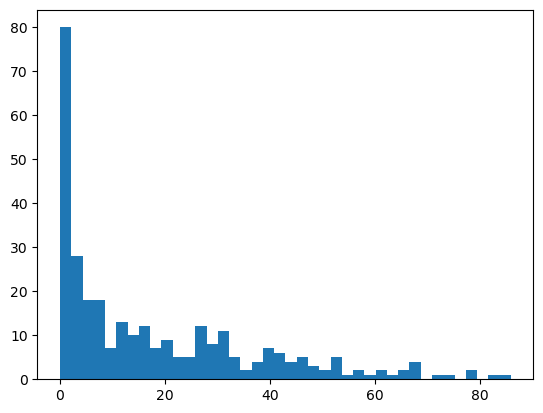

In [13]:
plt.hist(xynum, bins=40)
plt.show()

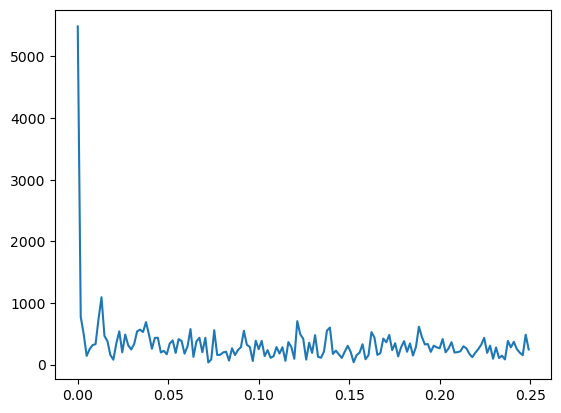

In [16]:
from scipy.fft import rfft, rfftfreq
DURATION = 912.912
SAMPLE_RATE = len(dg) / DURATION
# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

yf = rfft(xynum)
xf = rfftfreq(int(N), int(1 / SAMPLE_RATE))

plt.plot(xf, np.abs(yf))
plt.show()